In [20]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from config.py import password

# connect to postgres database
engine = create_engine('postgresql://postgres:' + password + '@localhost:5432/Employee_DB')
connection = engine.connect()

In [35]:
# query the database for salaries and output as dataframe
salaries = pd.read_sql_query(
'''SELECT salary
FROM Salaries'''
, connection)

In [63]:
# set default figure size
plt.rcParams["figure.figsize"] = (10,10)

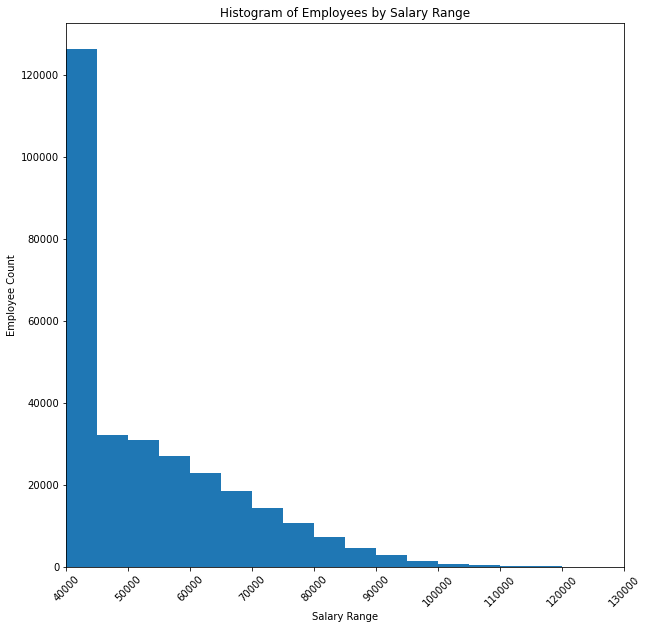

In [64]:
# create bin sizes for histogram
bins = [x for x in range(40000,135000,5000)]

# plot histogram with axis labels
plt.hist(salaries, bins)
plt.xlabel("Salary Range")
plt.ylabel("Employee Count")
plt.title("Histogram of Employees by Salary Range")
plt.xlim([40000,130000])
plt.xticks(rotation=45)
plt.savefig("Salary_Histogram.png")
plt.show()

In [65]:
# query the database for salary by title and output as dataframe
salary_x_title = pd.read_sql_query(
'''SELECT s.salary, t.title
FROM Employees AS e
JOIN Salaries AS s USING (emp_no)
JOIN Titles AS t ON (t.title_id=e.emp_title)'''
, connection)

In [86]:
# group by title and find average salary
avg_salary = salary_x_title.groupby(["title"]).mean().reset_index()

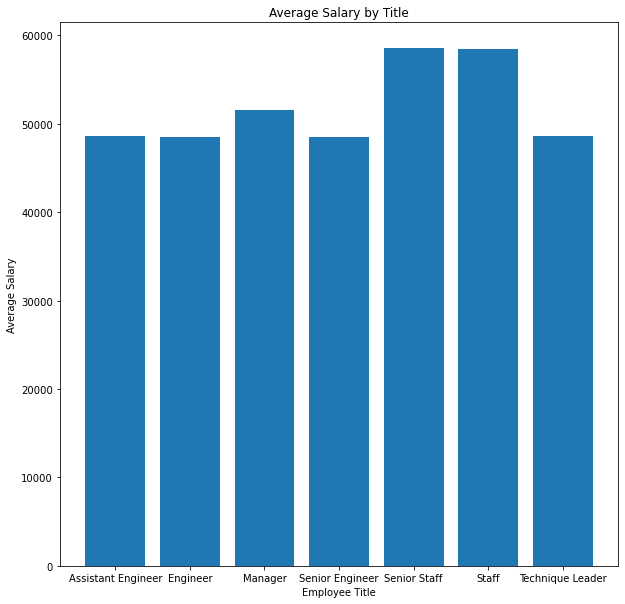

In [90]:
# create bar chart of average salary vs title
plt.bar(avg_salary["title"], avg_salary["salary"])
plt.xlabel("Employee Title")
plt.ylabel("Average Salary")
plt.title("Average Salary by Title")
plt.savefig("Salary_Title_Bar.png")
plt.show()

In [82]:
# query the database for my id number (499942) and output as dataframe
me = pd.read_sql_query(
'''SELECT s.salary, t.title, e.birth_date, e.first_name, e.last_name, e.sex, e.hire_date, d.dept_name
FROM Employees AS e
JOIN Salaries AS s USING (emp_no)
JOIN Titles AS t ON (t.title_id=e.emp_title)
JOIN Department_Employees USING (emp_no)
JOIN Departments AS d USING (dept_no)
WHERE e.emp_no = 499942;'''
, connection)

In [83]:
# display my info
me

,salary,title,birth_date,first_name,last_name,sex,hire_date,dept_name
0,40000,Technique Leader,1963-01-10,April,Foolsday,F,1997-02-10,Development
